In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers,models

In [2]:
train_data_path = 'train/train'
test_data_path = 'test/test'
val_data_path = 'validation/validation'

In [3]:
img_width = 180
img_hight = 180

In [4]:
train_data = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    image_size = (img_width , img_width ),
    shuffle=True,
    batch_size=32,
    validation_split=None
)

Found 3000 files belonging to 6 classes.


In [5]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_path,
    image_size = (img_width , img_width ),
    shuffle=True,
    batch_size=32,
    validation_split=None
)

Found 3000 files belonging to 6 classes.


In [6]:
data_cat = train_data.class_names

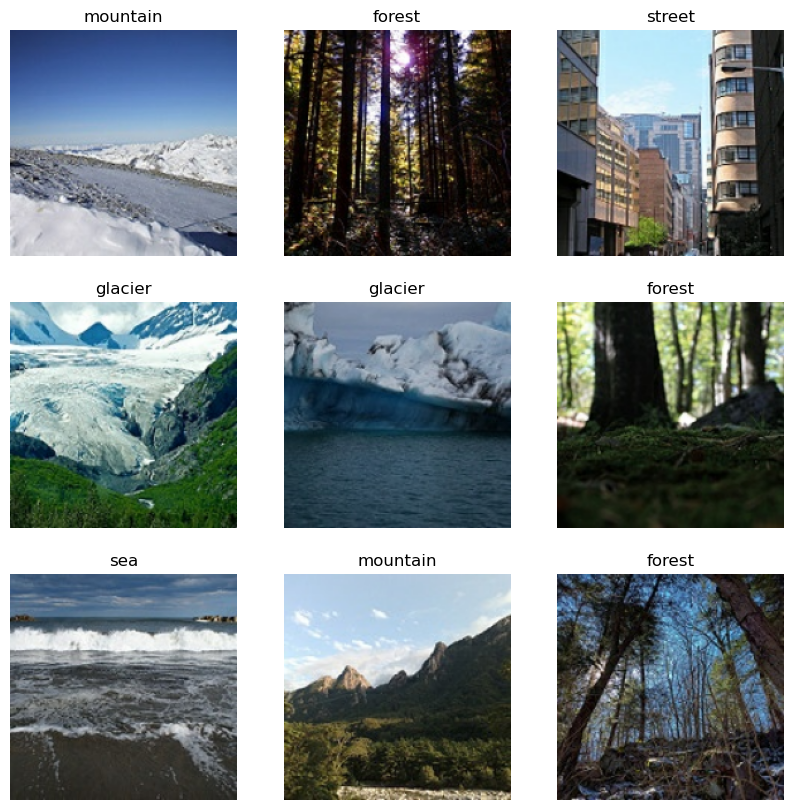

In [7]:
plt.figure(figsize=(10,10))
for image , labels in train_data.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras import Sequential


In [9]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

In [14]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(8,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(units = len(data_cat),activation='softmax'),
])


In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [18]:
epochs = 2
history = model.fit(train_data,validation_data=test_data,epochs=epochs,batch_size=32,verbose=1)

Epoch 1/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 17s 184ms/step - accuracy: 0.9707 - loss: 0.0875 - val_accuracy: 0.9657 - val_loss: 0.0955
Epoch 2/2
94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 190ms/step - accuracy: 0.9687 - loss: 0.0956 - val_accuracy: 0.9750 - val_loss: 0.0785


In [17]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 180, 180, 8)         │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 90, 90, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 90, 90, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 45, 45, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 45, 45, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 22, 22, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 22, 22, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7744)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         991,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,049,988 (11.63 MB)

 Trainable params: 1,016,662 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,033,326 (7.76 MB)

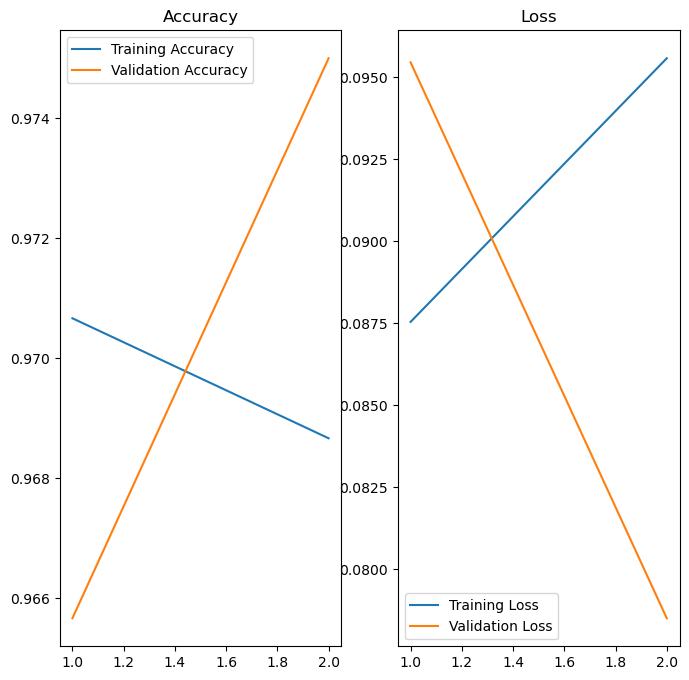

In [28]:
epochs_range = range(1, len(history.history['accuracy']) + 1)

plt.figure(figsize=(8,8))

# Accuracy Plot
plt.subplot(1,2,1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1,2,2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [37]:
image = 'sea.jpg'
image = tf.keras.utils.load_img(image,target_size=(img_hight,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [38]:
predcit = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


In [39]:
score = tf.nn.softmax(predcit)

In [40]:
print('In the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100))


In the image is sea with accuracy of 35.22


In [99]:
import gradio as gr

In [142]:
def forest_class(image):
    if img is None:
        return {"error": "No image uploaded"}   
    img = np.array(img)

    img = tf.image.resize(img, (img_hight,img_width))     
    img = np.expand_dims(img, axis=0)         
    img = preprocess_input(img)                

    preds = model.predict(img)
    prob = tf.nn.softmax(preds[0]).numpy()

    return {data_cat[i]: float(prob[i]) for i in range(len(data_cat))}
    return 'In the image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)], np.max(score)*100)


In [127]:
data_cat

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [117]:
model.save('forest_classfication.h5')

In [118]:
model = tf.keras.models.load_model("forest_classfication.h5")

In [143]:
demo = gr.Interface(
    fn=forest_class,
    inputs=gr.Image(type="numpy", label="Upload an Image"),
    outputs=gr.Label(num_top_classes=3, label="Predictions"),
    title="VGG16 Image Classifier",
    description="Upload an image of buildings, forest, glacier, mountain, sea, or street."
)

In [144]:
demo.launch(show_error=True)

* Running on local URL:  http://127.0.0.1:7866
* To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\furqan\anaconda3\Lib\site-packages\gradio\queueing.py", line 745, in process_events
    response = await route_utils.call_process_api(
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\furqan\anaconda3\Lib\site-packages\gradio\route_utils.py", line 354, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\furqan\anaconda3\Lib\site-packages\gradio\blocks.py", line 2116, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\furqan\anaconda3\Lib\site-packages\gradio\blocks.py", line 1623, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\furqan\anaconda3\Lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thre